## TPOT Demonstration
Example of tpot for a classification dataset
https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

From TPOT's paper:<br>auto-sklearn uses Bayesian optimization to discover the ideal combination of feature preprocessors, models, and model hyperparameters to maximize classification accuracy.<br>However, auto-sklearn explores a fixed set of pipelines that only include one data preprocessor, one feature preprocessor, and one model. Thus, auto-sklearn
is incapable of producing arbitrarily large pipelines, which may be important for autoML.

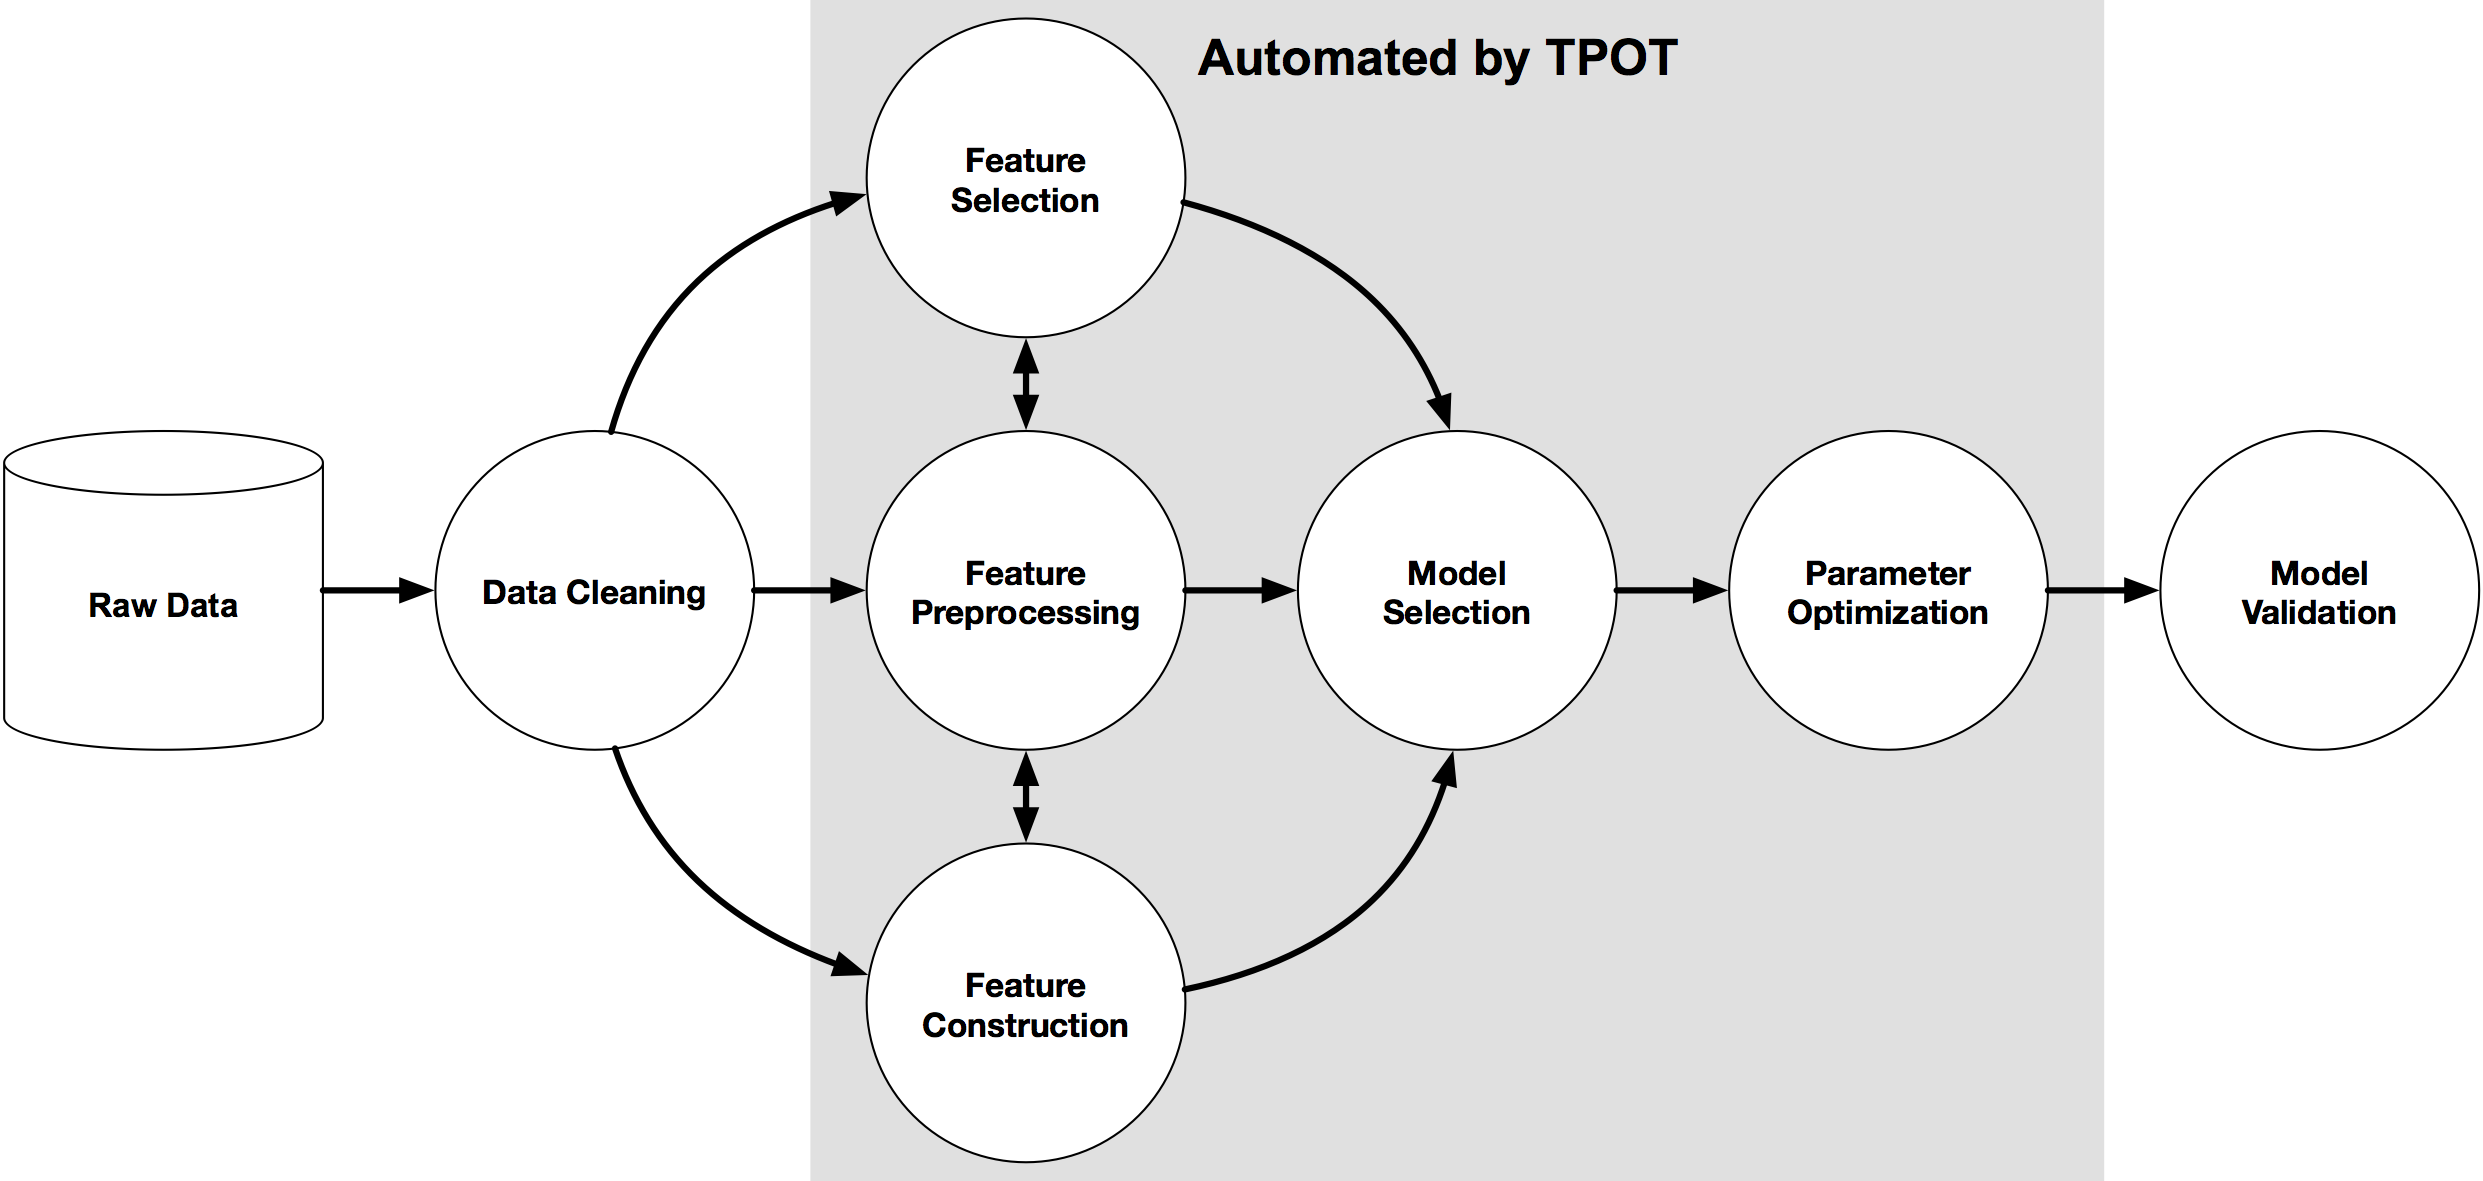

Sources:
* https://dl.acm.org/doi/pdf/10.1145/2908812.2908918
* https://github.com/EpistasisLab/tpot
* https://machinelearningmastery.com/automl-libraries-for-python/

In [2]:
# from sklearn.model_selection import RepeatedStratifiedKFold
# from tpot import TPOTClassifier
from multi_train_TPOT import MultiTrain
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


### Initialize MultiTrain

In [8]:
######## CREATE TRAIN AND TEST #########

# from sklearn.model_selection import train_test_split
# data = pd.read_csv('./data/milk/milk.csv')
# data['Grade'] = data['Grade'].map({'high': 2, 'medium': 1, 'low': 0})
# y = data['Grade']
# X = data.drop(['Grade'], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.to_csv('./data/milk/X_train.csv')
# y_train.to_csv('./data/milk/y_train.csv')
# y_test.to_csv('./data/milk/y_test.csv')
# X_test.to_csv('./data/milk/X_test.csv')


In [14]:
multi = MultiTrain()
multi.X_train = pd.read_csv('./data/milk/X_train.csv', index_col=[0])
multi.y_train = pd.read_csv('./data/milk/y_train.csv', index_col=[0])
multi.X_test = pd.read_csv('./data/milk/X_test.csv', index_col=[0])
multi.y_test = pd.read_csv('./data/milk/y_test.csv', index_col=[0])


In [15]:
multi.X_train.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
331,6.8,40,1,0,1,0,245
44,6.6,45,0,0,0,1,250
307,6.8,45,1,1,1,0,245
323,9.0,43,1,0,1,1,250
1009,9.0,43,1,0,1,1,250


### define search

In [18]:
# generations = [4, 16, 32, 64, 128]
population_sizes = [1, 2, 4, 8, 16, 32, 64, 128]
offspring_sizes =  [1, 2, 4, 8, 16, 32, 64, 128]
mutation_rates =   [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
crossover_rates =  [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# # One run:
generations = []
# population_sizes = []
# offspring_sizes = []
# mutation_rates = []
# crossover_rates = []


In [19]:
%%time
multi.build_and_fit_classifier(dataset_name='Milk', generations=generations,
                              population_sizes=population_sizes,
                              offspring_sizes=offspring_sizes,
                              mutation_rates=mutation_rates,
                              crossover_rates=crossover_rates)

-> Fitting - Population Size: 1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/1 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9126000696136444

Best pipeline: GaussianNB(input_matrix)
Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_1.py'
-> Fitting - Population Size: 2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/2 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9964497041420118

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=51, p=2, weights=distance)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_2.py'
-> Fitting - Population Size: 4


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/4 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9976331360946744

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=2, max_features=0.4, min_samples_leaf=14, min_samples_split=9, n_estimators=100, subsample=0.6500000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_4.py'
-> Fitting - Population Size: 8


Optimization Progress:   0%|          | 0/8 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9964497041420118

Best pipeline: KNeighborsClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), n_neighbors=72, p=1, weights=distance)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_8.py'
-> Fitting - Population Size: 16


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/16 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988165680473372

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=1, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=0.55, verbosity=0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_16.py'
-> Fitting - Population Size: 32


Optimization Progress:   0%|          | 0/32 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988165680473372

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=10, max_features=0.55, min_samples_leaf=17, min_samples_split=4, n_estimators=100, subsample=0.9500000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_32.py'
-> Fitting - Population Size: 64


Optimization Progress:   0%|          | 0/64 [00:00<?, ?pipeline/s]


12.61 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(VarianceThreshold(input_matrix, threshold=0.001), learning_rate=0.5, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=12, min_samples_split=6, n_estimators=100, subsample=0.5)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_64.py'
-> Fitting - Population Size: 128


Optimization Progress:   0%|          | 0/128 [00:00<?, ?pipeline/s]


10.36 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=5, min_samples_split=10, n_estimators=100)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_population-size_128.py'
-> Fitting - Offspring Size: 1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988165680473372

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=8, max_features=0.45, min_samples_leaf=9, min_samples_split=10, n_estimators=100, subsample=0.5)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_1.py'
-> Fitting - Offspring Size: 2


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.997640097459102

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=1, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.15000000000000002, verbosity=0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_2.py'
-> Fitting - Offspring Size: 4


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988165680473372

Best pipeline: GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=1.0, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=19, min_samples_split=3, n_estimators=100, subsample=0.9000000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_4.py'
-> Fitting - Offspring Size: 8


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.997640097459102

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=8, max_features=0.7500000000000001, min_samples_leaf=10, min_samples_split=18, n_estimators=100, subsample=0.2)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_8.py'
-> Fitting - Offspring Size: 16


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988165680473372

Best pipeline: GaussianNB(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=8, max_features=0.5, min_samples_leaf=16, min_samples_split=14, n_estimators=100, subsample=0.7500000000000001))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_16.py'
-> Fitting - Offspring Size: 32


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988165680473372

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=10, max_features=0.6500000000000001, min_samples_leaf=4, min_samples_split=11, n_estimators=100, subsample=0.55)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_32.py'
-> Fitting - Offspring Size: 64


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


11.33 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.25, min_samples_leaf=3, min_samples_split=3, n_estimators=100)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_64.py'
-> Fitting - Offspring Size: 128


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


12.65 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=0.5, verbosity=0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_offspring-size_128.py'
-> Fitting - Mutation Rate: 0.1, Crossover Rate: 0.9


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: 

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.17 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=2, max_features=0.45, min_samples_leaf=18, min_samples_split=16, n_estimators=100, subsample=0.45)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.1,0.9.py'
-> Fitting - Mutation Rate: 0.2, Crossover Rate: 0.8


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


11.30 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=8, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=3, n_estimators=100, subsample=0.4)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.2,0.8.py'
-> Fitting - Mutation Rate: 0.3, Crossover Rate: 0.7


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


11.23 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(RobustScaler(input_matrix), learning_rate=1.0, max_depth=1, min_child_weight=4, n_estimators=100, n_jobs=1, subsample=0.9000000000000001, verbosity=0)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.3,0.7.py'
-> Fitting - Mutation Rate: 0.4, Crossover Rate: 0.6


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.33 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=3, max_features=0.45, min_samples_leaf=3, min_samples_split=12, n_estimators=100, subsample=0.9000000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.4,0.6.py'
-> Fitting - Mutation Rate: 0.5, Crossover Rate: 0.5


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.22 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=5, max_features=0.7000000000000001, min_samples_leaf=12, min_samples_split=14, n_estimators=100, subsample=0.55)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.5,0.5.py'
-> Fitting - Mutation Rate: 0.6, Crossover Rate: 0.4


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.35 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: KNeighborsClassifier(RobustScaler(input_matrix), n_neighbors=38, p=2, weights=distance)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.6,0.4.py'
-> Fitting - Mutation Rate: 0.7, Crossover Rate: 0.3


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


12.30 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.1, max_depth=7, max_features=0.25, min_samples_leaf=12, min_samples_split=6, n_estimators=100, subsample=0.7000000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.7,0.3.py'
-> Fitting - Mutation Rate: 0.8, Crossover Rate: 0.2


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: 

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.81 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=3, max_features=0.4, min_samples_leaf=17, min_samples_split=7, n_estimators=100, subsample=0.9000000000000001)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.8,0.2.py'
-> Fitting - Mutation Rate: 0.9, Crossover Rate: 0.1


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


10.81 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=4, max_features=0.6000000000000001, min_samples_leaf=9, min_samples_split=13, n_estimators=100, subsample=0.55)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished - saved to './models/Milk/tpot/tpot_Milk_mut-cross-rate_0.9,0.1.py'
End
CPU times: user 22min 50s, sys: 26.3 s, total: 23min 17s
Wall time: 3h 19min 3s


/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/usr/local/lib/python3.8/dist-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warn

## Visualize 

In [20]:
collected_data = pd.read_csv('./models/Milk/tpot/logs/log.csv', index_col=[0])
collected_data

,Feature,Value,Elapsed_Time,Train_Score,Test_Score
0,Population_Size,1,12.598271,0.946871,0.943396
1,Population_Size,2,22.505129,1.000000,0.995283
2,Population_Size,4,24.046731,0.998819,0.985849
3,Population_Size,8,60.112467,1.000000,0.990566
4,Population_Size,16,111.752687,0.998819,0.990566
5,Population_Size,32,234.735999,1.000000,0.995283
6,Population_Size,64,764.564787,1.000000,0.990566
7,Population_Size,128,640.222516,0.997639,0.990566
8,Offspring_Size,1,374.218965,1.000000,0.995283
9,Offspring_Size,2,286.591302,0.997639,0.985849


In [21]:
population_size_df = collected_data[collected_data['Feature'] == 'Population_Size']
offspring_size_df = collected_data[collected_data['Feature'] == 'Offspring_Size']
mutcross_rates_df = collected_data[collected_data['Feature'] == 'Mutation_Crossover_Rates']

### Population Size Effects

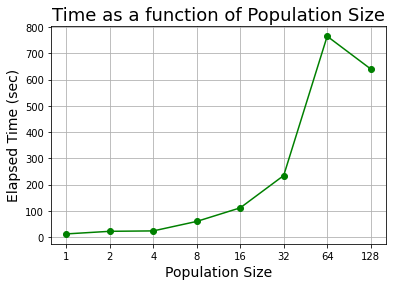

In [22]:
plt.plot(population_size_df['Value'], population_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

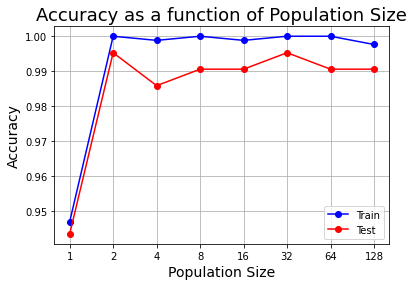

In [23]:
plt.plot(population_size_df['Value'], population_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(population_size_df['Value'], population_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Population Size', fontsize=18)
plt.xlabel('Population Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Offspring Size Effects

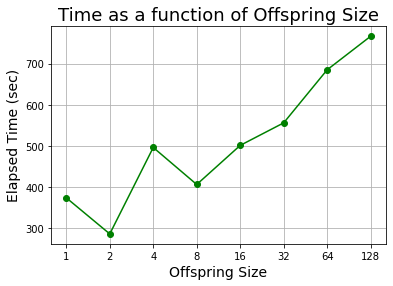

In [24]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

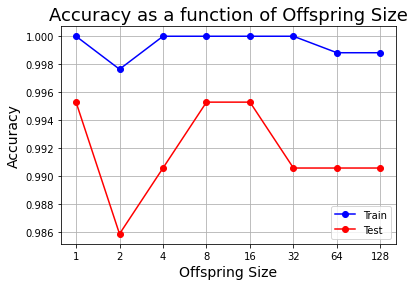

In [25]:
plt.plot(offspring_size_df['Value'], offspring_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(offspring_size_df['Value'], offspring_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Offspring Size', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Mutation - Crossover Rates Effects

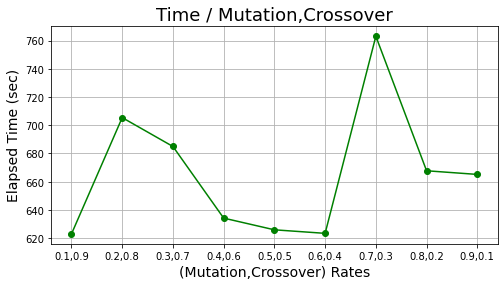

In [26]:
plt.figure(figsize=(8,4))

plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time / Mutation,Crossover', fontsize=18)
plt.xlabel('(Mutation,Crossover) Rates', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)

plt.show()

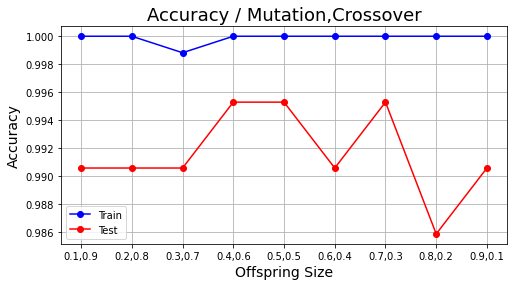

In [27]:
plt.figure(figsize=(8,4))
plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(mutcross_rates_df['Value'], mutcross_rates_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy / Mutation,Crossover', fontsize=18)
plt.xlabel('Offspring Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()